# BeautifulSoup Package Tutorial 
---
### Web Scraping in Python
BeautifulSoup is a Python library that is used for web scraping purposes. It is a powerful tool for parsing HTML and XML documents and extracting useful information from them. With BeautifulSoup, you can navigate the parse tree of a web page, search for specific elements, and extract their contents.

---
### Installs
If you have not installed `BeautifulSoup` or `requests` previously, uncomment the following lines as needed, run the cell, and restart your kernel.

In [ ]:
#!pip install beautifulsoup4
#!pip install requests

---
### Obtain HTML Document
To start with `BeautifulSoup`, we need an HTML document. Python's `requests` package helps us to obtain the HTML of a given website.

More information regarding the `response.status_code` variable can be found at the following:
- [Successful Response Codes (100-199)](https://www.geeksforgeeks.org/http-status-codes-successful-responses/)
- [Informational Response Codes (200-299)](https://www.geeksforgeeks.org/http-status-codes-informational-responses/)

In [ ]:
import requests

website = "https://msu-cmse-courses.github.io/cmse495-SS23/Schedule"

response = requests.get(website)
if response.status_code != 200:
    content = "Error fetching page (ERROR CODE {})".format(response.status_code)
else:
    content = response.content
    
print(content)

### Parsing HTML through BeautifulSoup

We want to create a `soup` object in BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(content, 'html.parser')

In [ ]:
### Uncomment the following line for detailed help with the soup object
#?soup

To format the `soup` object output in a more readable fashion, use `soup.prettify()`.

In [ ]:
print(soup.prettify())

#### What is Soup?

Soup (short for tag-soup) comes from the jumble of words and HTML tags we see above. `BeautifulSoup` allows us to turn the complex HTML document into a tree of Python objects. 

There are four main types of objects in `BeautifulSoup`: **Tag**, **NavigatableString**, **BeautifulSoup**, and **Comment**.

The primary focus of this tutorial, the `BeautifulSoup` object represents the parsed document as a whole. To navigate the `BeautifulSoup` object, you can reference the name of the HTML tag you want to search for.

Detailed HTML tag information can be found [here](https://www.w3schools.com/tags/).

In [ ]:
## Print the title of the webpage

print(soup.title)

You can also chain this trick repeatedly to drill deeper into the parsed tree. For example,

In [ ]:
## Gets the first paragraph of the body of the soup

print(soup.body.p)

An issue with the above is that it only obtains the first instance of the supplied tag in the `soup` object. Using the `find_all()` function, we can obtain all instances of the tag.

In [ ]:
# Obtain all paragraphs in the body of the soup

soup.body.find_all('p')

In [ ]:
## Obtain all hyperlinks in the body of the soup
links = soup.body.find_all('a')

## Show the first 10 hyperlinks in the body
links[:10]

---
# Example Uses of BeautifulSoup
The following examples are common use cases of BeautifulSoup, and a brief explanation of how to accomplish each of them is given below.

1. Pulling Data From a Table
2. Parsing Content on a Webpage
3. Key Functions of BeautifulSoup

---
### Data from a Table
#### Example: Manaus Neighborhood List

The table contains columns with the neighborhood, zone, population, area, density, and number of homes

Download the HTML file and create the soup object

In [ ]:
# Suppress Pandas Warnings, Safe
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.reset_option('all')

In [ ]:
url = "https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Manaus"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

There can be multiple data tables in the HTML you use. You need to look at the original HTML file and look at what the attributes of the table are.

If you look at the table class, this has the attributes of the class.
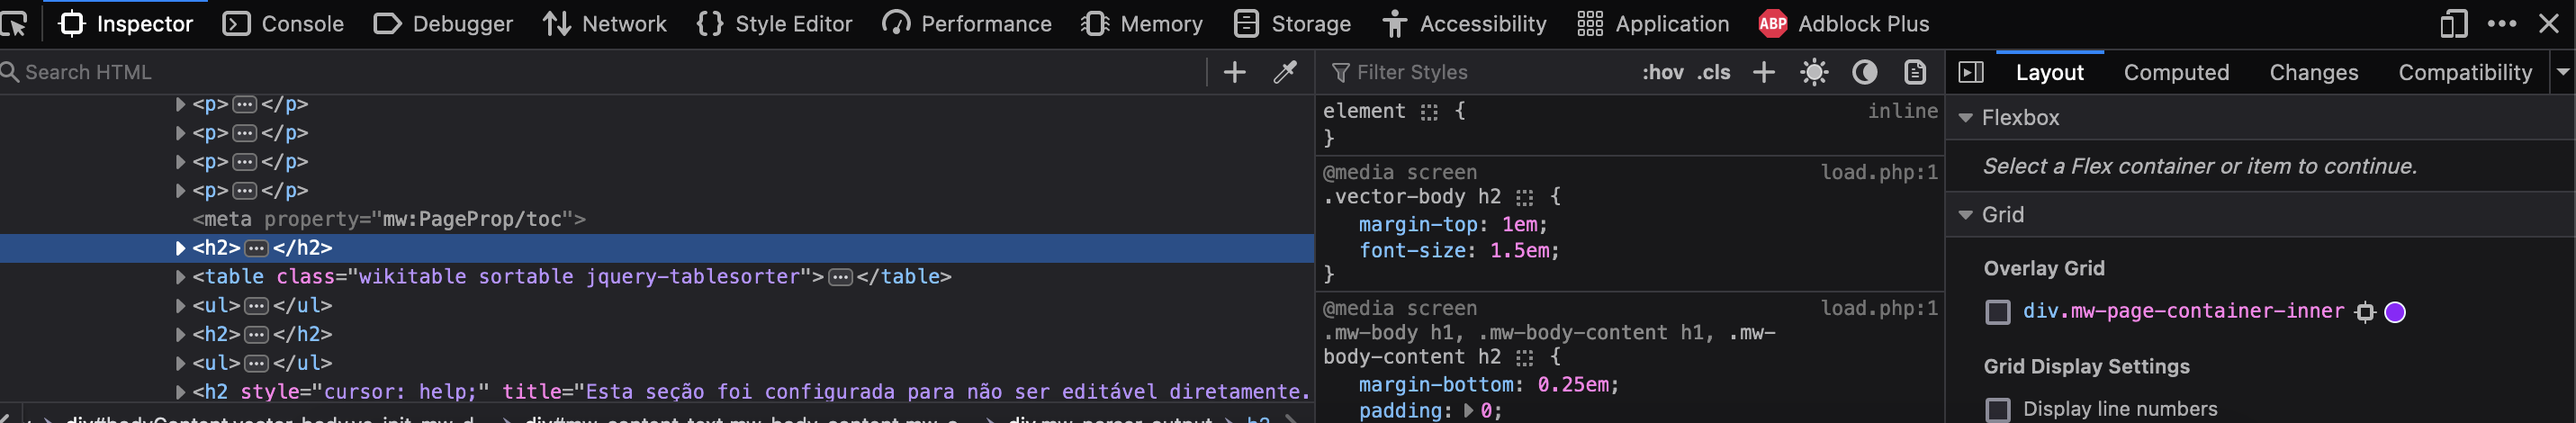

The next thing is to computationally get each attribute of the table so we can choose the correct attribute of the table.

In [ ]:
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

In [ ]:
tables = soup.find_all('table')

#  Looking for the table with the classes 'wikitable' and 'sortable'
table = soup.find('table', class_='wikitable sortable')

Now we can create our own dataframe.

In [ ]:
df = pd.DataFrame(columns=['Neighborhood', 'Zone', 'Area', 'Population', 'Density', 'Homes_count'])

# Collecting Ddata
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
    if(columns != []):
        neighborhood = columns[0].text.strip()
        zone = columns[1].text.strip()
        area = columns[2].span.contents[0].strip('&0.')
        population = columns[3].span.contents[0].strip('&0.')
        density = columns[4].span.contents[0].strip('&0.')
        homes_count = columns[5].span.contents[0].strip('&0.')

        df = df.append({'Neighborhood': neighborhood,  'Zone': zone, 'Area': area, 'Population': population, 'Density': density, 'Homes_count': homes_count}, ignore_index=True)

In [ ]:
df.head()

---
### Using Beautiful Soup to get the Most Common Words on a Webpage
Import the `Counter` function from the `typing` library. The `word_list` gives the word that your want to not include in the counter

The soup object needs to the split so it is a list of every word on the website. Loop through all the words until you get to your stop words. 

The `.most_common()` function can be used to see the most common words and the input is the number of the most top common words you want to see.


In [ ]:
from typing import Counter
# word list is the words that you don't want to include
word_list = [""]
word_count = Counter()
all_words = soup.get_text(" ", strip=True).lower().split()
for word in all_words:
    cln_word = word.strip('.,?')
    # ignore words less 4 char long
    if len(cln_word) > 3:
        # ignore words in our custom stop list
        if cln_word in word_list:
            continue
        word_count[cln_word] += 1

print("10 most common words:")
word_count.most_common(10)

---
### Some Key BeautifulSoup Functions

Here are some examples of BeautifulSoup functions that have been made available to use:

#### `get()`
The `get()` function can help us go to a specific webpage we want to see.

First, choose an URL you'd like to get data from:

In [ ]:
URL = 'https://msu-cmse-courses.github.io/cmse495-SS23/'
headers = {"User-agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.41'}

page = requests.get(URL, headers=headers)
hot_soup = BeautifulSoup(page.content, 'html.parser')
print(hot_soup) 

#### `find()` / `find_all()`
The function `find()` returns the first element of a given tag.

In [ ]:
hot_soup.find('title')

The function `find_all()` grabs all the elements of given tag. For example, the loop below displays all the hyperlinks from the URL above.

In [ ]:
for link in hot_soup.find_all('a'):
    href = link.get('href')
    if href is not None and not (href.startswith('http') or href.startswith('./') or href.startswith('mailto:colbrydi@msu.edu ')):
        continue  # Skip links that don't match the expected prefixes
    print(href)